<a href="https://colab.research.google.com/github/suongnhibrady/school-projects/blob/main/Python_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#an exploration of public health data
#python project 2
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [31]:
df.describe()
#compare age groups to find highest reported admissions, readmissions, and time in hospital

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [32]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [33]:
#cleaning unnecessary data
df.drop(['race', 'gender', 'weight', 'payer_code', 'medical_specialty',
         'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
      'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)

In [34]:
df.head()

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
0,2278392,8222157,[0-10),6,25,1,1,0,0,0,1,NaN,NaN,No,No,NO
1,149190,55629189,[10-20),1,1,7,3,0,0,0,9,NaN,NaN,Ch,Yes,>30
2,64410,86047875,[20-30),1,1,7,2,2,0,1,6,NaN,NaN,No,Yes,NO
3,500364,82442376,[30-40),1,1,7,2,0,0,0,7,NaN,NaN,Ch,Yes,NO
4,16680,42519267,[40-50),1,1,7,1,0,0,0,5,NaN,NaN,Ch,Yes,NO


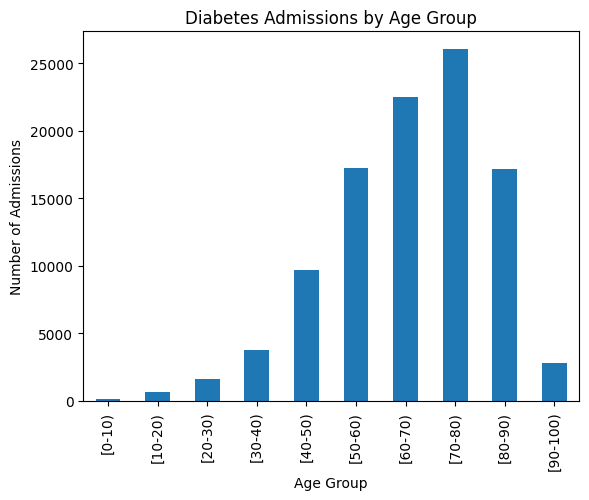

In [42]:
#admissions by age group
admissions_by_age = df.groupby('age')['encounter_id'].count()
admissions_by_age.plot(kind='bar', title='Diabetes Admissions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Admissions')
plt.show()

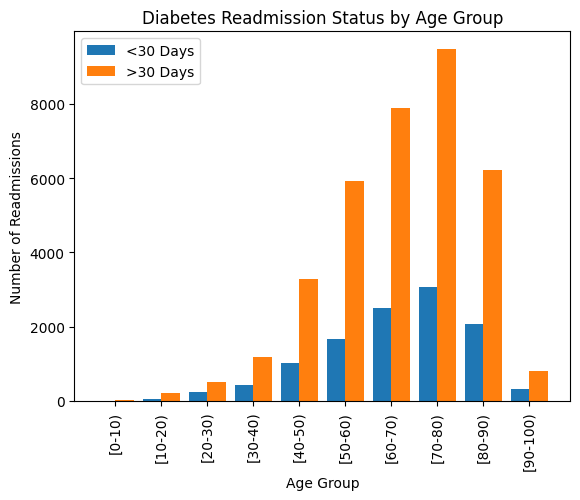

In [72]:
#readmissions by age group
#don't count no record of readmission
readmit = ['<30', '>30']
age_groups = sorted(df['age'].unique())

#count readmissions for each category per age group
readmit_counts = {
    cat: [((df[df['age'] == age]['readmitted']) == cat).sum() for age in age_groups]
    for cat in readmit
}

x = range(len(age_groups))
plt.bar([i - 0.4/2 for i in x], readmit_counts['<30'], width=0.4, label='<30 Days')
plt.bar([i + 0.4/2 for i in x], readmit_counts['>30'], width=0.4, label='>30 Days')

plt.title('Diabetes Readmission Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Readmissions')
plt.xticks(ticks=x, labels=age_groups, rotation=90)
plt.legend()
plt.show()

(1.0, 5.049060882712101)

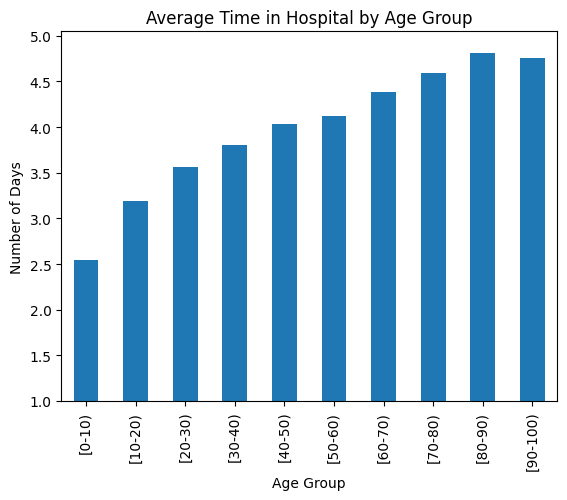

In [78]:
#time in hospital by age group
avg_time = df.groupby('age')['time_in_hospital'].mean()
avg_time.plot(kind='bar', title='Average Time in Hospital by Age Group')
plt.ylabel('Number of Days')
plt.xlabel('Age Group')
plt.ylim(1)

highest diabetes admissions by age group:70-80

highest diabetes readmission status by age group (both <30 and >30 days): 70-80

highest average hospital stays by age group: 80-90

Based on this data, older patients (+70) are more likely to be admitted and readmitted to a hospital for diabetes. Their durations of stay are longer as well.